In [18]:
## Importing the neccessaries modules 
import os,PIL,cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL

In [19]:
## to know the current working directory
base = os.getcwd()
base

'/Users/paramkesarwani/DataScience/tensorflow/DataScienceModel'

In [20]:
## link for a image in local system
link = './datasets/virat/virat.jpg'
link

'./datasets/virat/virat.jpg'

In [21]:
"""
cv2 is opencv(python module), it has a method name imread which takes as input link of image and return 
the tensor(vector or numpy array) of that image
"""
img = cv2.imread(link)
img

array([[[241, 239, 245],
        [241, 239, 245],
        [241, 239, 245],
        ...,
        [233, 237, 242],
        [233, 237, 242],
        [233, 237, 242]],

       [[241, 239, 245],
        [241, 239, 245],
        [241, 239, 245],
        ...,
        [233, 237, 242],
        [233, 237, 242],
        [233, 237, 242]],

       [[241, 239, 245],
        [241, 239, 245],
        [241, 239, 245],
        ...,
        [233, 237, 242],
        [233, 237, 242],
        [233, 237, 242]],

       ...,

       [[ 54,  83,  50],
        [ 54,  83,  50],
        [ 54,  83,  50],
        ...,
        [150, 142, 202],
        [150, 142, 202],
        [150, 142, 202]],

       [[ 54,  83,  50],
        [ 54,  83,  50],
        [ 54,  83,  50],
        ...,
        [150, 142, 202],
        [150, 142, 202],
        [150, 142, 202]],

       [[ 54,  83,  50],
        [ 54,  83,  50],
        [ 54,  83,  50],
        ...,
        [150, 142, 202],
        [150, 142, 202],
        [150, 142, 202]]

In [23]:
# The shape or dimension of image , 3 factor shows image contain rgb channel and 960* 1600 are image dimension
img.shape

(960, 1600, 3)

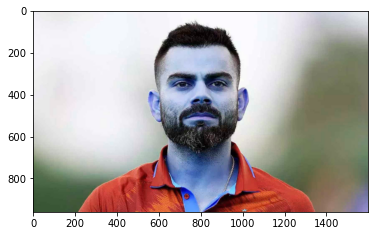

In [24]:
# plotting the image using python module
plt.imshow(img)

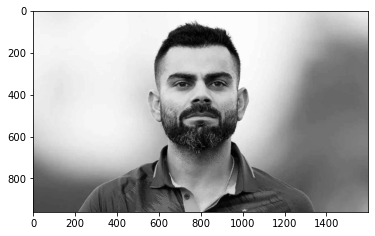

In [25]:
# removing the rgb channels in the image ie a black&white image
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grey,cmap='gray')

In [26]:
# we can see the shape of grey image dont have the 3rd dimension i.e the color channel
grey.shape

(960, 1600)

In [27]:
"""
An image can have many peoples in it and even face of the person in that image might not be clearly visible(half face or
person turned around) . These data is not useful for classifier to be trained on , so we will detect the face and 
eye of persons in the image and crop that portion of image and will feed that portion to the model for training.
Face cascade below detect face and eye cascade the eyes 
"""
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [28]:
"""Face cascade return boundary rectangles for the detected faces (i.e., x, y, w, h)"""
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
x,y,z,w = faces[0]
print(x,y,z,w)

567 160 459 459


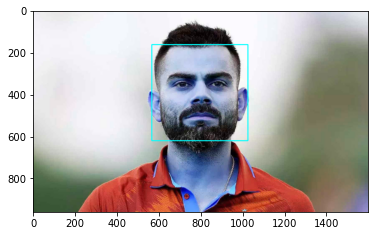

In [35]:
# creating a rectangle around the boundary return by face cascade
image = cv2.rectangle(img,(x,y),(x+z,y+w),(0,255,255),3)
plt.imshow(image)

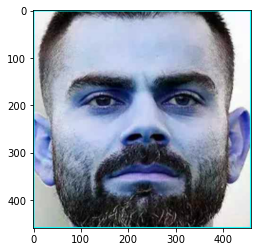

In [36]:
#cropping the rectangular area using numpy array slicing 
ims = image[y:y+w,x:x+z]
plt.imshow(ims)

In [37]:
#Detecting the eyes in the cropped face
eyes = eye_cascade.detectMultiScale(ims)
eyes

array([[251, 130, 107, 107],
       [ 96, 145,  92,  92]], dtype=int32)

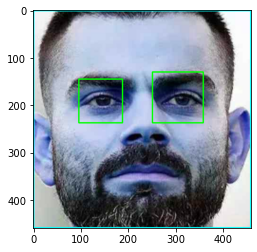

In [38]:
# creating the rectangle around the eyes using coordinates returned by eyes cascade
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(ims,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(ims)

In [39]:
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_grey = grey[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_grey)
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

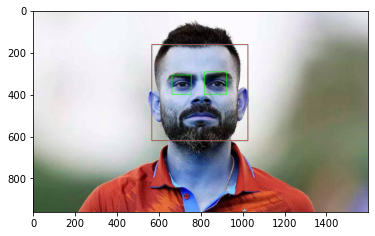

In [40]:
plt.imshow(img)


In [41]:
"""this function is the combination of above works i.e will take as input the image dir and will return a cropped 
   image of it if face cascade detect face in image and eye cascade detect atleast 2 eyes in the image  """
def image_circle(link):
    img = cv2.imread(link)
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(grey, 1.3, 5)
    for (x,y,z,h) in faces:
        img0 = cv2.rectangle(img,(x,y),(x+z,y+h),(255,0,0),2)
        roi_grey = grey[y:y+h, x:x+z]
        roi_color = img[y:y+h, x:x+z]
        eyes = eye_cascade.detectMultiScale(roi_grey)
        if len(eyes)>=1:
             return roi_color

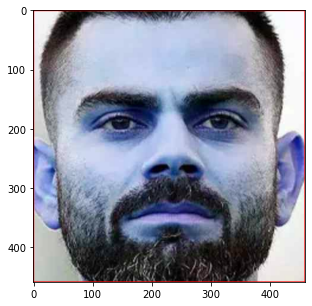

In [42]:
# we passed the link of virat kohlis image to image_circle function and it return the crop image of face detected 
# Now we can use this image for model training
img = image_circle(link)
plt.figure(figsize=(5,5))
if img is not None:
    plt.imshow(img)
else :
    print('No face')
# print(img)

In [ ]:
""" Now our job is to do the Image cropping of the all the image in our dataset"""

In [107]:
""" getallimage function will take the image directory as params and will app;ly the crop operation on all
images in that directory and will save this croppped image in a new folder"""
link = './datasets/'
def getallimage(dir):
    name = dir.split('/')[-1]  # get the name of folder
    newDir = os.path.join(link,'cropped','{}'.format(name)) # newdir to store the cropped images
    
    if not os.path.exists(newDir):   # if the newdir exists ignore else create the directory
        os.makedirs(newDir)
    
    count = 0   
    print('Getting the Image of {}'.format(name))
    for image in os.listdir(dir):
        
        if image.startswith('.'):  # ignore the hidden files 
            continue
        
        img_link = os.path.join(dir,image)
        img = cv2.imread(img_link)
        if img is None: 
            continue
        grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(grey, 1.3, 5)
        for (x,y,z,h) in faces:
            roi_grey = grey[y:y+h, x:x+z]
            roi_color = img[y:y+h, x:x+z]
            eyes = eye_cascade.detectMultiScale(roi_grey)
            if len(eyes)>1:
                image_name = os.path.join(newDir,'{}.jpg'.format(count))
                cv2.imwrite(image_name,roi_color)
                count= count+1

In [94]:
# celebrities whose face is to be detected using model
celebs=['pichae','elonmusk','virat','ronaldo','dhoni']
len(celebs)

5

In [95]:
link = './datasets/'
dict = {}# Dictionary will save the name of celeb as key and all the image dir of that corresponding celebrity in it

In [97]:
for name in celebs:
    dict[name]=[]
    image_dir = link+name
    print(f"Storing the image of {name}")
    for img in os.listdir(image_dir):
        if img.startswith('.'):
            continue
        dict[name].append(image_dir+'/'+img)

Storing the image of pichae
Storing the image of elonmusk
Storing the image of virat
Storing the image of ronaldo
Storing the image of dhoni


In [99]:
len(dict['virat'])

98

In [105]:
if not os.path.exists(link+'cropped'):
    os.mkdir(link+'cropped')
crop_link = link+'cropped'
for name,image in dict.items():
    dir = link+name
    getallimage(dir)
    
    

Getting the Image of pichae
Getting the Image of elonmusk
Getting the Image of virat
Getting the Image of ronaldo
Getting the Image of dhoni


In [ ]:
# Thus we now have the cropped image of all the 5 celebrity in their respective folders
# DataCollection process is done 
# Now we have to create a Deep Learning model and train it over these images 
# Model creation is in file DataScinceModel.ipynb file